# Homework-X2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

2025-10-16 11:15:32.366310: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-16 11:15:32.426811: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-16 11:15:33.901697: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(tf.keras.utils.get_file("mnist.npz", origin="https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
/home/nieruichen/.keras/datasets/mnist.npz


In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

I0000 00:00:1760613346.138497 3132759 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4609 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
I0000 00:00:1760613346.144255 3132759 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 4237 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1b:00.0, compute capability: 8.6
I0000 00:00:1760613346.151810 3132759 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 2207 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1c:00.0, compute capability: 8.6
I0000 00:00:1760613346.156752 3132759 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 4567 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1d:00.0, compute capability: 8.6
I0000 00:00:1760613346.163287 3132759 gpu_device.cc:2020] Cr

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.


I0000 00:00:1760613347.787641 3132759 mlir_graph_optimization_pass.cc:437] MLIR V1 optimization pass is not enabled


Epoch [0][20]	 Batch [0][550]	 Training Loss 2.0767	 Accuracy 0.0500
Epoch [0][20]	 Batch [50][550]	 Training Loss 1.0201	 Accuracy 0.0892
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.8257	 Accuracy 0.1052
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.7543	 Accuracy 0.1130
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.7109	 Accuracy 0.1221
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.6826	 Accuracy 0.1293
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.6592	 Accuracy 0.1392
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.6413	 Accuracy 0.1477
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.6266	 Accuracy 0.1551
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.6139	 Accuracy 0.1624
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.6024	 Accuracy 0.1707

Epoch [0]	 Average training loss 0.5917	 Average training accuracy 0.1784
Epoch [0]	 Average validation loss 0.4723	 Average validation accuracy 0.2646

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.4896	 Accuracy 0.2000

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7876.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 3.9053	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.2716	 Accuracy 0.1400
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.8106	 Accuracy 0.1623
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.5884	 Accuracy 0.1791
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.4473	 Accuracy 0.1915
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.3384	 Accuracy 0.2087
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.2561	 Accuracy 0.2231
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.1890	 Accuracy 0.2374
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.1316	 Accuracy 0.2544
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.0829	 Accuracy 0.2685
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.0415	 Accuracy 0.2816

Epoch [0]	 Average training loss 1.0045	 Average training accuracy 0.2946
Epoch [0]	 Average validation loss 0.5974	 Average validation accuracy 0.4502

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.5593	 Accuracy 0.4400

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8544.



## Plot

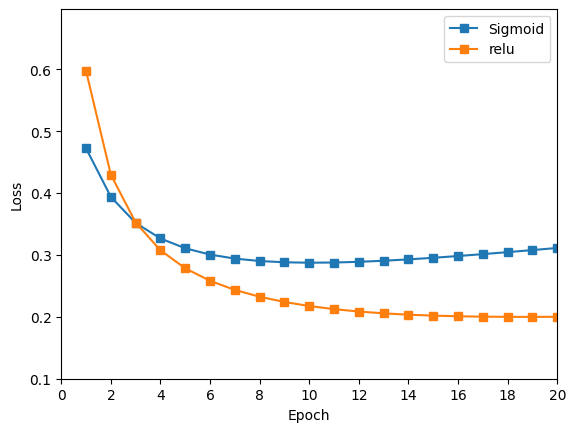

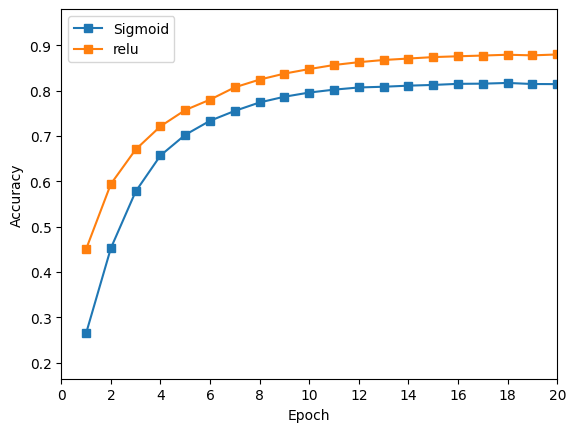

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [15]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.6991	 Accuracy 0.0700
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5949	 Accuracy 0.0616
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.5456	 Accuracy 0.0604
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.5073	 Accuracy 0.0629
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.4766	 Accuracy 0.0660
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.4493	 Accuracy 0.0698
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.4269	 Accuracy 0.0746
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.4078	 Accuracy 0.0784
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.3909	 Accuracy 0.0824
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.3755	 Accuracy 0.0884
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.3618	 Accuracy 0.0950

Epoch [0]	 Average training loss 2.3494	 Average training accuracy 0.1025
Epoch [0]	 Average validation loss 2.2135	 Average validation accuracy 0.1990

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.2300	 Accuracy 0.1400

### Test

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.6940.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [18]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.6365	 Accuracy 0.0800
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.6123	 Accuracy 0.0818
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.5561	 Accuracy 0.0830
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4963	 Accuracy 0.0905
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.4490	 Accuracy 0.0982
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.4059	 Accuracy 0.1101
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.3671	 Accuracy 0.1243
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.3278	 Accuracy 0.1403
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.2911	 Accuracy 0.1586
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.2568	 Accuracy 0.1772
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.2249	 Accuracy 0.1962

Epoch [0]	 Average training loss 2.1944	 Average training accuracy 0.2163
Epoch [0]	 Average validation loss 1.8414	 Average validation accuracy 0.4450

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.7866	 Accuracy 0.5000

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8647.



## Plot

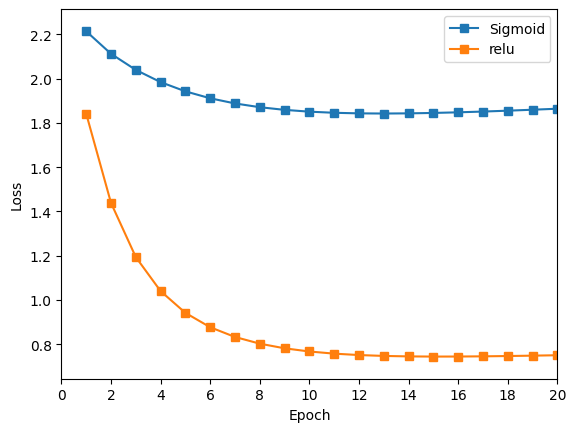

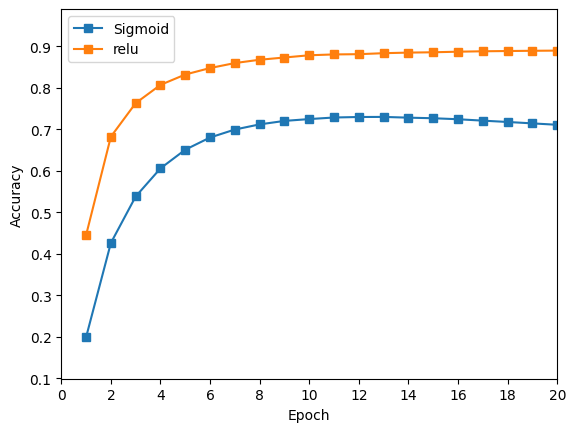

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework X2, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5957	 Accuracy 0.1500
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5063	 Accuracy 0.1153
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4262	 Accuracy 0.1214
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.3643	 Accuracy 0.1364
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.3141	 Accuracy 0.1532
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.2672	 Accuracy 0.1772
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.2260	 Accuracy 0.2000
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.1917	 Accuracy 0.2207
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.1590	 Accuracy 0.2431
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.1284	 Accuracy 0.2629
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.0985	 Accuracy 0.2835

Epoch [0]	 Average training loss 2.0707	 Average training accuracy 0.3029
Epoch [0]	 Average validation loss 1.7307	 Average validation accuracy 0.5328

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.6964	 Accuracy 0.5800

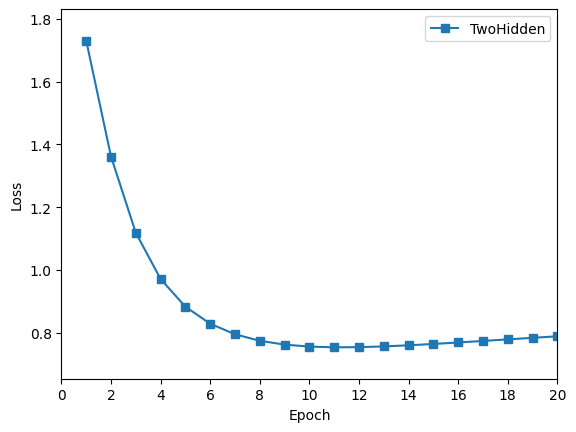

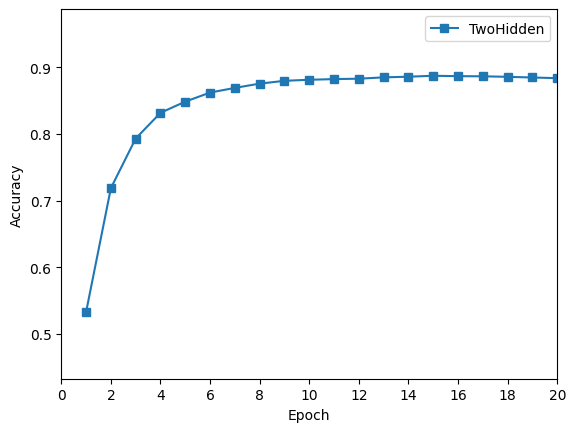

In [22]:
# 构建两隐藏层MLP
two_hidden_MLP = Network()
two_hidden_MLP.add(FCLayer(784, 128))
two_hidden_MLP.add(ReLULayer())           # 第一隐藏层激活
two_hidden_MLP.add(FCLayer(128, 64))
two_hidden_MLP.add(ReLULayer())           # 第二隐藏层激活
two_hidden_MLP.add(FCLayer(64, 10))       # 输出层

# 训练
two_hidden_MLP, two_loss, two_acc = train(two_hidden_MLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

# 测试
test(two_hidden_MLP, criterion, data_test, batch_size, disp_freq)

# 可视化
plot_loss_and_acc({'TwoHidden': [two_loss, two_acc]})